<a href="https://colab.research.google.com/github/luizfilipisousamoura/QuantumComputing/blob/main/QuantumComputingWithQiskit/25_arbitraryStateInitialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.4/240.4 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 929.9/929.9 KB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 

In [2]:
!pip3 install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136833 sha256=c6ba1562ba18d323b474ddd036281bc193f181a392991bad552cf4e14a5ce01c
  Stored in directory: /root/.cache/pip/wheels/72/99/be/81d9bcdf5dd5ee5acd8119a9dd5bc07204c9ce205fd341b021
Successfully built pylatexenc


In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc0 = QuantumCircuit(q,c)
qc1 = QuantumCircuit(q,c)

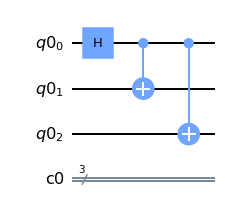

In [4]:
qc0.h(q[0])
qc0.cx(q[0],q[1])
qc0.cx(q[0],q[2])
qc0.draw('mpl')

In [5]:
from qiskit.quantum_info import Statevector

In [6]:
psi0 = Statevector(qc0)
psi0.draw('latex')

<IPython.core.display.Latex object>

In [7]:
from math import sqrt

In [8]:
ampl =[sqrt(2)/2,0,0,0,0,0,0,sqrt(2)/2]

In [9]:
qc1.initialize(ampl,[q[0],q[1],q[2]])

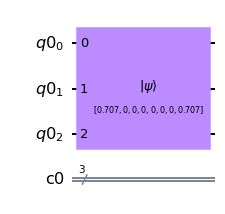

In [10]:
qc1.draw('mpl')

In [11]:
psi1 = Statevector(qc1)
psi1.draw('latex')

<IPython.core.display.Latex object>

In [12]:
qc0.measure(q[0],c[0])
qc0.measure(q[1],c[1])
qc0.measure(q[2],c[2])
qc1.measure(q[0],c[0])
qc1.measure(q[1],c[1])
qc1.measure(q[2],c[2])

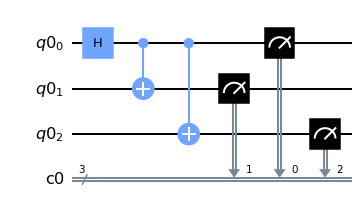

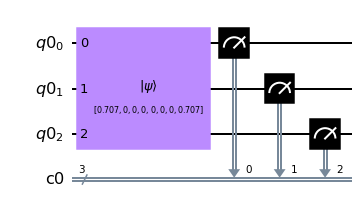

In [13]:
display(qc0.draw('mpl'),qc1.draw('mpl'))

In [14]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_list = [qc0,qc1]
qc_compiled = transpile(qc_list,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

[{'000': 511, '111': 513}, {'111': 533, '000': 491}]


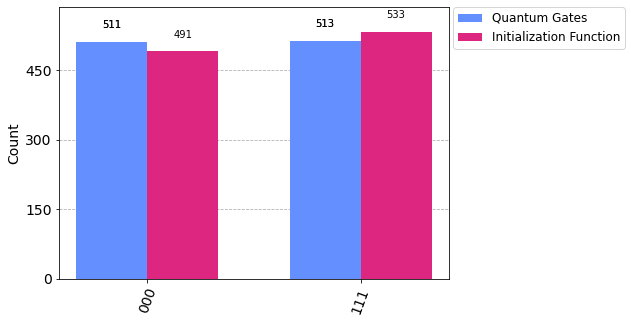

In [15]:
from qiskit.visualization import plot_histogram
plot_histogram(counts,legend=['Quantum Gates','Initialization Function'])